In [1]:
!pip install qiskit
!pip install qiskit-aer
!pip install pylatexenc

In [2]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector, partial_trace
from qiskit.visualization import plot_bloch_multivector
import numpy as np

Initial state of qubit 0:


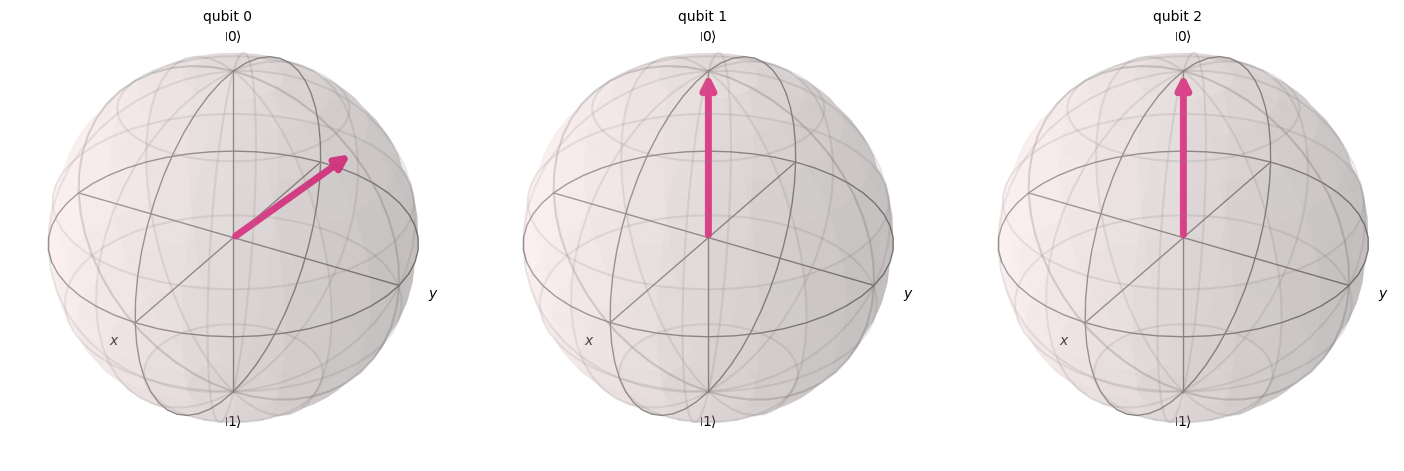

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


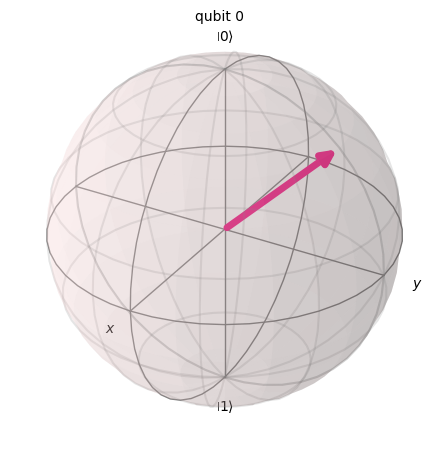

In [3]:
#Task 1: Custom state teleportation

qc = QuantumCircuit(3)

theta, phi = np.pi / 4, np.pi / 2
qc.ry(theta, 0)
qc.rz(phi, 0)

sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

qc.h(1)
qc.cx(1, 2)

qc.cx(0, 1)
qc.h(0)

qc.cx(1, 2)
qc.cz(0, 2)

qc.save_statevector()

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")


print("\nBob’s final qubit (qubit 2) Bloch vector:")

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

Initial state of qubit 0:


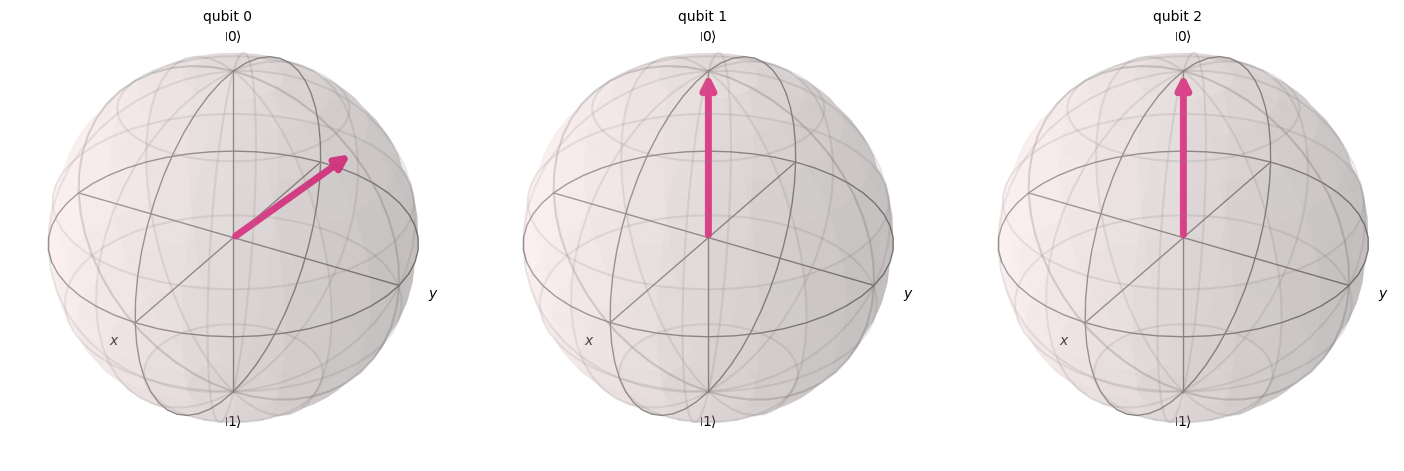

Fidelity between initial and teleported states: 1.000000

Bob’s final qubit (qubit 2) Bloch vector:


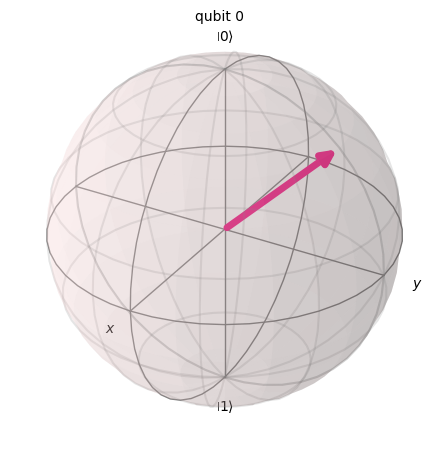

In [4]:
#Task 2: Custom state teleportation with classical measurement and conditional correction

qc = QuantumCircuit(3, 2) # Add classical bits for measurement results

theta, phi = np.pi / 4, np.pi / 2
qc.ry(theta, 0)
qc.rz(phi, 0)

sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

qc.h(1)
qc.cx(1, 2)

qc.cx(0, 1)
qc.h(0)

# Measure qubits 0 and 1
qc.measure([0, 1], [0, 1])

# Apply conditional corrections based on measurement results
with qc.if_test((0, 1)):
    qc.z(2)
with qc.if_test((1, 1)):
    qc.x(2)

qc.save_statevector()

sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

sv_final = result.data(0)["statevector"]
sv_final = Statevector(sv_final)

rho_bob = partial_trace(sv_final, [0, 1])
rho_init = partial_trace(sv_initial, [1, 2])

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
init_state = eigvecs_i[:, np.argmax(eigvals_i)]

fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
print(f"Fidelity between initial and teleported states: {fidelity:.6f}")


print("\nBob’s final qubit (qubit 2) Bloch vector:")

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

Average fidelity over 20 states: 1.000000


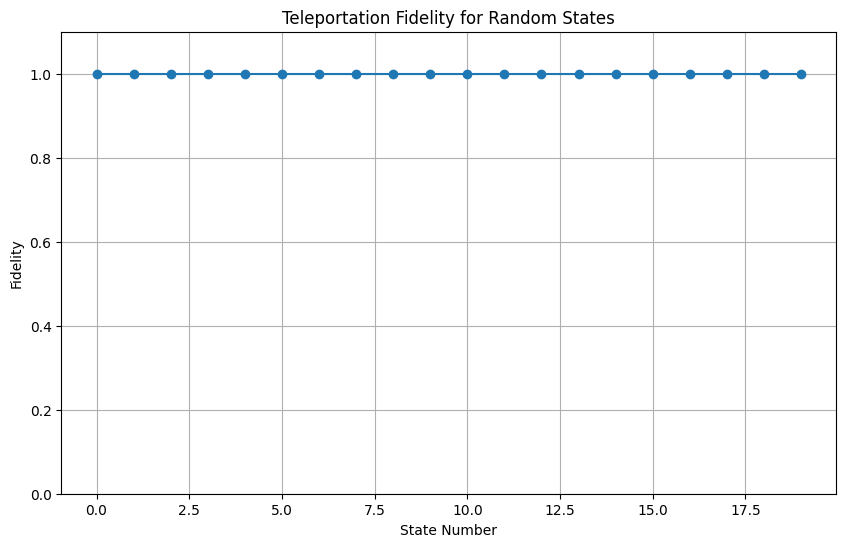

In [5]:
#Task 3 - Fidelity analysis
import random
import matplotlib.pyplot as plt

def generate_random_state():
    """Generates random theta and phi values for a qubit state."""
    theta = random.uniform(0, np.pi)
    phi = random.uniform(0, 2 * np.pi)
    return theta, phi

def run_teleportation_and_get_fidelity(theta, phi):
    """Runs the teleportation circuit for a given initial state and returns the fidelity."""
    qc = QuantumCircuit(3, 2)

    qc.ry(theta, 0)
    qc.rz(phi, 0)

    sv_initial = Statevector.from_instruction(qc)

    qc.h(1)
    qc.cx(1, 2)

    qc.cx(0, 1)
    qc.h(0)

    qc.measure([0, 1], [0, 1])

    with qc.if_test((0, 1)):
        qc.z(2)
    with qc.if_test((1, 1)):
        qc.x(2)

    qc.save_statevector()

    sim = AerSimulator()
    compiled = transpile(qc, sim)
    result = sim.run(compiled).result()

    sv_final = result.data(0)["statevector"]
    sv_final = Statevector(sv_final)

    rho_bob = partial_trace(sv_final, [0, 1])
    rho_init = partial_trace(sv_initial, [1, 2])


    eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob.data)
    eigvals_i, eigvecs_i = np.linalg.eigh(rho_init.data)
    bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
    init_state = eigvecs_i[:, np.argmax(eigvals_i)]

    fidelity = np.abs(np.vdot(init_state, bob_state)) ** 2
    return fidelity

num_states = 20
fidelities = []

for _ in range(num_states):
    theta, phi = generate_random_state()
    fidelity = run_teleportation_and_get_fidelity(theta, phi)
    fidelities.append(fidelity)

average_fidelity = np.mean(fidelities)
print(f"Average fidelity over {num_states} states: {average_fidelity:.6f}")

plt.figure(figsize=(10, 6))
plt.plot(fidelities, marker='o', linestyle='-')
plt.title("Teleportation Fidelity for Random States")
plt.xlabel("State Number")
plt.ylabel("Fidelity")
plt.ylim(0, 1.1)
plt.grid(True)
plt.show()

Initial state of qubit 0:


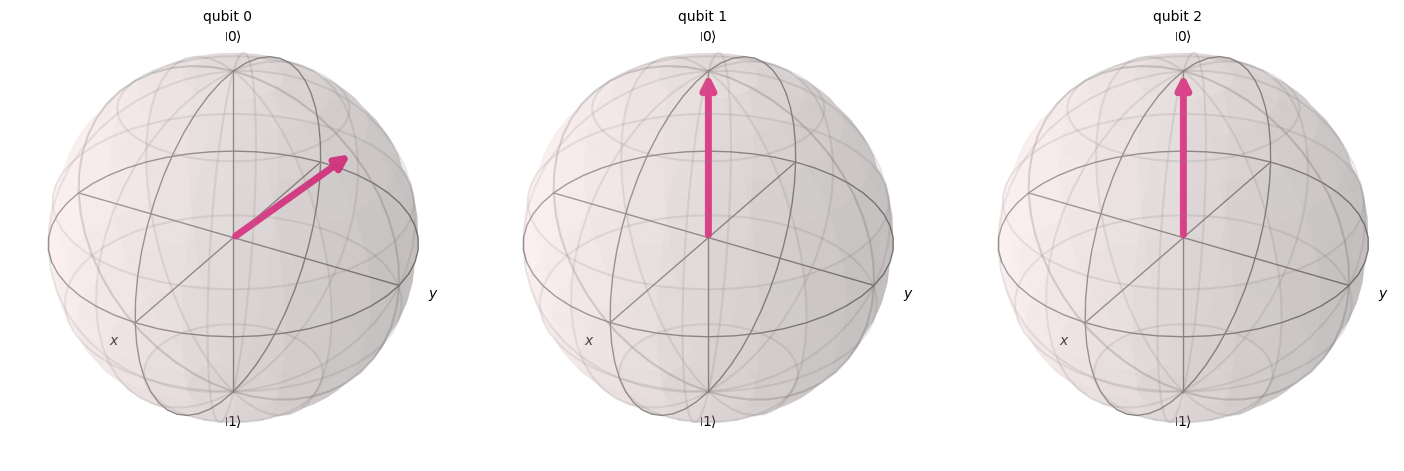

State after entanglement (qubits 1 and 2):


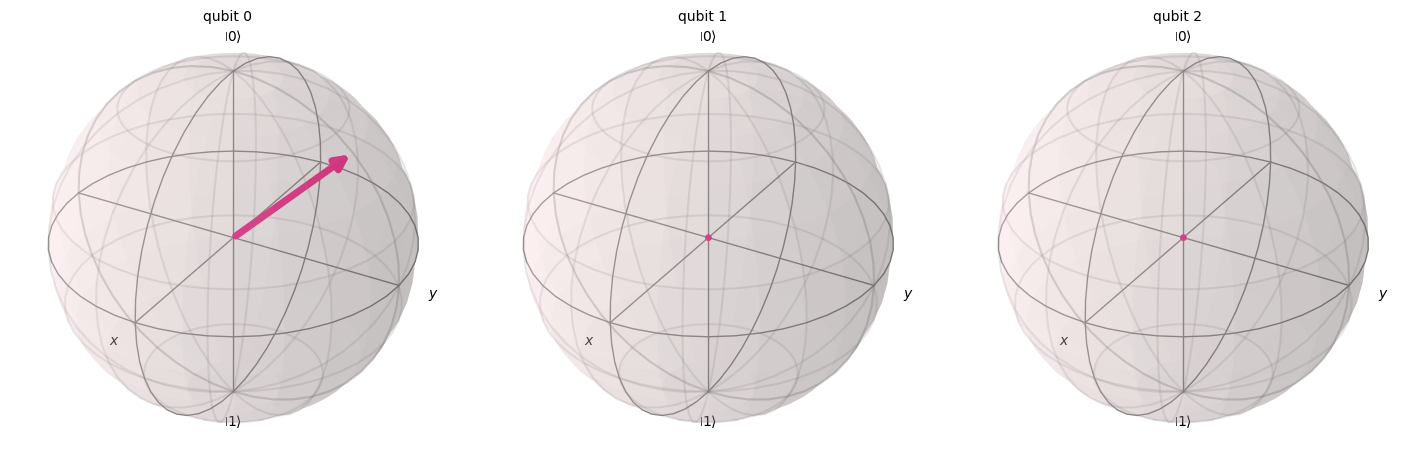

State after Bell state measurement (qubits 0 and 1):


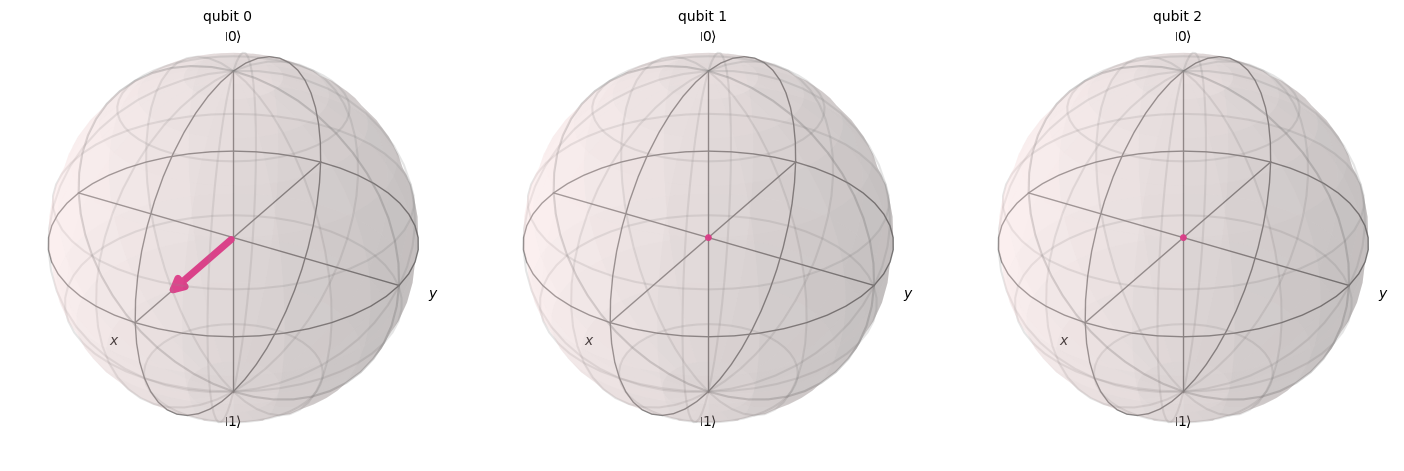

Final state on qubit 2:


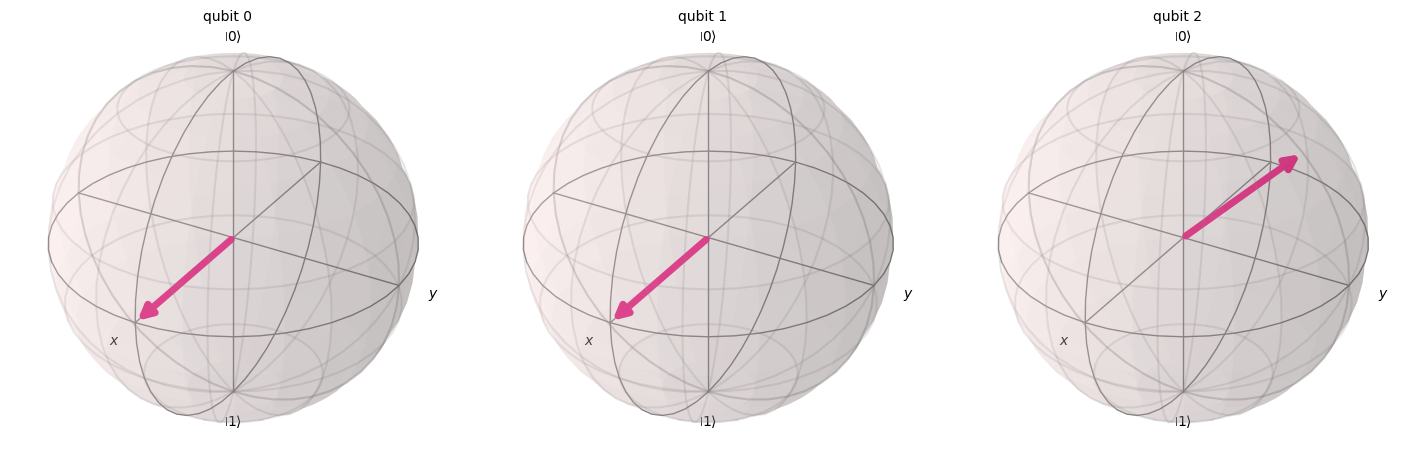

In [6]:
#Task 4 - Step by step visualization

qc = QuantumCircuit(3)

theta, phi = np.pi / 4, np.pi / 2
qc.ry(theta, 0)
qc.rz(phi, 0)

# Initial state of qubit 0
qc.save_statevector(label='initial')


qc.h(1)
qc.cx(1, 2)

# State after entanglement of qubits 1 and 2
qc.save_statevector(label='entangled')

qc.cx(0, 1)
qc.h(0)

# State after Bell state measurement
qc.save_statevector(label='bell_measurement')

qc.cx(1, 2)
qc.cz(0, 2)

# Final state on qubit 2 before measurement
qc.save_statevector(label='final')


sim = AerSimulator()
compiled = transpile(qc, sim)
result = sim.run(compiled).result()

# Get saved statevectors
initial_state = result.data(0)['initial']
entangled_state = result.data(0)['entangled']
bell_measurement_state = result.data(0)['bell_measurement']
final_state = result.data(0)['final']

# Visualize states
print("Initial state of qubit 0:")
display(plot_bloch_multivector(initial_state))

print("State after entanglement (qubits 1 and 2):")
display(plot_bloch_multivector(entangled_state))

print("State after Bell state measurement (qubits 0 and 1):")
display(plot_bloch_multivector(bell_measurement_state))

print("Final state on qubit 2:")
display(plot_bloch_multivector(final_state))

Initial state of qubit 0:


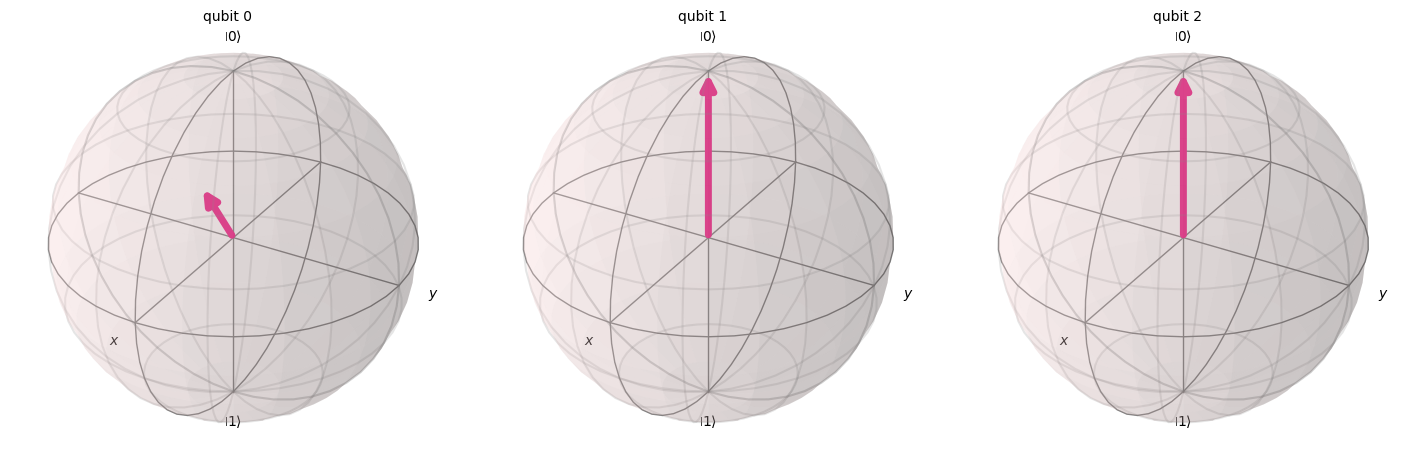


Fidelity (Ideal): 1.000000
Fidelity (With Noise, rate=0.02): 0.916713

Bloch vector of Bob’s qubit (with noise):


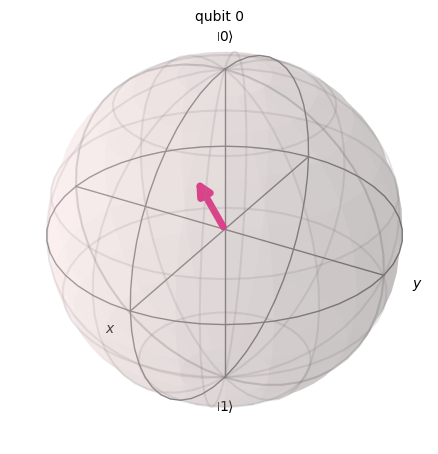

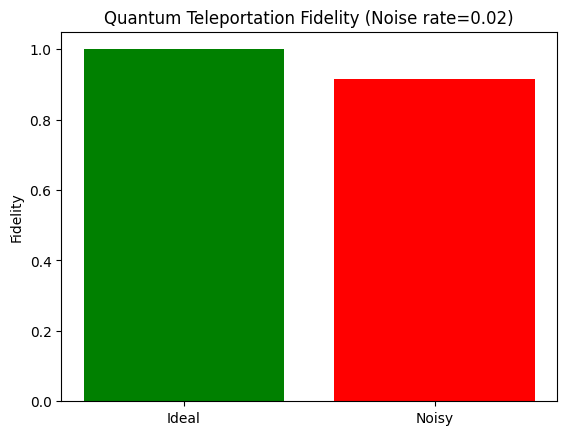

In [9]:
#Task 5 - Introduction noise
from qiskit.quantum_info import (
    Statevector, partial_trace, DensityMatrix, state_fidelity
)
from qiskit.visualization import plot_bloch_multivector
from qiskit_aer.noise import NoiseModel, depolarizing_error

noise_rate = 0.02

noise_model = NoiseModel()
error1 = depolarizing_error(noise_rate, 1)
error2 = depolarizing_error(noise_rate, 2)
noise_model.add_all_qubit_quantum_error(error1, ['ry', 'rz', 'h'])
noise_model.add_all_qubit_quantum_error(error2, ['cx'])


qc = QuantumCircuit(3)

theta, phi = 0.8, 0.3
qc.ry(theta, 0)
qc.rz(phi, 0)

sv_initial = Statevector.from_instruction(qc)
print("Initial state of qubit 0:")
display(plot_bloch_multivector(sv_initial))

qc.h(1)
qc.cx(1, 2)
qc.cx(0, 1)
qc.h(0)
qc.cx(1, 2)
qc.cz(0, 2)

qc.save_density_matrix()

sim_ideal = AerSimulator()
sim_noisy = AerSimulator(noise_model=noise_model)

compiled_ideal = transpile(qc, sim_ideal)
compiled_noisy = transpile(qc, sim_noisy)

result_ideal = sim_ideal.run(compiled_ideal).result()
result_noisy = sim_noisy.run(compiled_noisy).result()

rho_final_ideal = DensityMatrix(result_ideal.data(0)['density_matrix'])
rho_final_noisy = DensityMatrix(result_noisy.data(0)['density_matrix'])

rho_bob_ideal = partial_trace(rho_final_ideal, [0, 1])
rho_bob_noisy = partial_trace(rho_final_noisy, [0, 1])

rho_init = partial_trace(DensityMatrix(sv_initial), [1, 2])


fidelity_ideal = state_fidelity(rho_init, rho_bob_ideal)
fidelity_noisy = state_fidelity(rho_init, rho_bob_noisy)

print(f"\nFidelity (Ideal): {fidelity_ideal:.6f}")
print(f"Fidelity (With Noise, rate={noise_rate}): {fidelity_noisy:.6f}")

print("\nBloch vector of Bob’s qubit (with noise):")

eigvals_b, eigvecs_b = np.linalg.eigh(rho_bob_noisy.data)
bob_state = eigvecs_b[:, np.argmax(eigvals_b)]
bob_sv = Statevector(bob_state)

display(plot_bloch_multivector(bob_sv))

labels = ['Ideal', 'Noisy']
values = [fidelity_ideal, fidelity_noisy]

plt.bar(labels, values, color=['green', 'red'])
plt.title(f"Quantum Teleportation Fidelity (Noise rate={noise_rate})")
plt.ylim(0, 1.05)
plt.ylabel("Fidelity")
plt.show()
